# Django 3일차

### Sending form data(Client)

<b>HTML \<form\> element</b>  

데이터가 전송되는 방법을 정의  
웹에서 사용자 정보를 입력하는 여러 방식(text, button, submit 등)을 제공하고, <b>사용자로부터 할당된 데이터를 서버로 전송</b>하는 역할을 담당  
데이터를 어디(action)로 어떤 방식(method)으로 보낼지  

- 핵심 속성  
    - action
    - method

&nbsp;

1. action
- 입력된 데이터가 전송될 URL을 지정
- 데이터를 어디로 보낼 것인지 지정하는 것이며 이 값은 반드시 유효한 URL이어야 함  
- 만약 이 속성을 지정하지 않으면 데이터는 현재 form이 있는 페이지의 URL로 보내짐  

2. method
- 데이터를 어떻게 보낼 것인지 정의
- 입력 데이터의 HTTP request methods를 지정  
- HTML form 데이터는 오직 2가지 방법으로만 전송 할 수 있는데 바로 GET 방식과 POST 방식  



<b>HTML \<input\> element</b> 

사용자로부터 데이터를 입력 받기 위해 사용  

"type" 속성에 따라 동작 방식이 달라진다.  
- input 요소의 동작 방식은 type 특성에 따라 현격히 달라지므로 각각의 type은 별도로 MDN 문서에서 참고하여 사용하도록 함
- type을 지정하지 않은 경우, 기본값은 "text"
- 핵심 속성: name

&nbsp;

<b>HTML input's attribute</b>  

<b>name</b>  

- form을 통해 데이터를 제출(submit)했을 때 name 속성에 설정된 값을 서버로 전송하고, 서버는 name 속성에 설정된 값을 통해 사용자가 입력한 데이터 값에 접근할 수 있음  
- 서버에 전달하는 파라미터(name은 key, value는 value)로 매핑

<b>HTTP request methods</b>  

HTTP  
- HTML 문서와 같은 리소스(데이터, 자원)들을 가져올 수 있도록 해주는 프로토콜(규칙, 규약)
- 웹에서 이루어지는 모든 데이터 교환의 기초  
- HTTP는 주어진 리소스가 수행할 작업을 나타내는 request methods를 정의  
- 자원에 대한 행위(수행하고자 하는 동작)를 정의  
- 주어진 리소스(자원)에 수행하길 원하는 행동을 나타냄  
- HTTP Method 예시
    - GET, POST, PUT, DELETE
- GET이 아닌 다른 method는 추후에 다시 알아볼 예정  

&nbsp;

<b>GET</b>

서버로부터 정보를 조회하는 데 사용
- 즉, 서버로에게 리소스를 요청하기 위해 사용  

데이터를 가져올 때만 사용해야 함  

데이터를 서버로 전송할 때 Query String Parameters를 통해 전송  
- 데이터는 URL에 포함되어 서버로 보내짐  

&nbsp;

<b>GET method 작성</b>

Get과 get 모두 대소문자 관계없이 동일하게 동작하지만 명시적으로 표현을 위해 대문자 사용을 권장  

데이터 입력 후 submit button을 누르고 URL의 변화를 확인한다.

```
{% extends "base.html" %}
{% comment %} throw.html {% endcomment %}

{% block content %}
  <h1>throw!</h1>

  <form action="#" method="GET">
    <label for="message">보내고 싶은 데이터 적기</label>
    <input type="text" id="message" name='message'>
    <input type="submit">
  </form>
{% endblock content %}
```

--------------------------------------------------------------------------------------  

[참고]
method="get" // "post"  
GET -> GET 메소드는 주로 데이터를 읽거나 검색  
POST -> POST 메소드는 주로 새로운 리소스를 생성(create) 시 사용  
            (인스타 인터페이스 연다 -> get)
            (인스타에 무언가를 새로 올릴떄는(포스팅할떄) -> post)  

GET 메소드를 사용하면 모든 form data는   
URL로 인코딩되어 action URL에 query string parameters로 전달됩니다.  

--------------------------------------------------------------------------------------  

[참고]  
request.get()    vs     request.GET.get('message')    

request라는 이름의 객체에 대해 get메소드를 실행 (파이썬 딕셔너리 에서의 get 개념)  

request.GET은 django에서 사용   
"request"는 Http request가 보내졌을 때에 django가 만든 객체이며,   
"request.GET"을 실행하는 것으로, request의 정보를 딕셔너리로 얻을수 있게 하는것   

따라서 request.GET.get('message')  뜻은   
-> request.GET한 딕셔너리형태의 정보에서 get() 메소드를 실행하여 데이터 얻기   

--------------------------------------------------------------------------------------  

<b>Query String Parameters</b>  

사용자가 입력 데이터를 전달하는 방법 중 하나로, url 주소에 데이터를 파라미터를 통해 넘기는 것  

이러한 문자열 은 &(앰퍼샌드)로 연결된 key=value 쌍으로 구성되며 기본 URL과 ?(물음표)로 구분됨
- 예시
    - ```http://host:port/path?key=value&key=value```  
Query String이라고도 함  

정해진 주소 이후에 물음표를 쓰는 것으로 Query String이 시작함을 알림  

"key=value"로 필요한 파라미터의 값을 적음  

- "="로 key와 value가 구분됨  

파라미터가 여러 개일 경우 "&"를 붙여 여러 개의 파라미터를 넘길 수 있음  

그러나 아직 어디로 보내야(action)할지 작성하지 않았다.  

### Retrieving  the data (Server)

<b>Retrieving  the data (Server)</b>

"데이터 가져오기(검색하기)"  

서버는 클라이언트로 받은 key-value 쌍의 목록과 같은 데이터를 받게 됨   

이러한 목록에 접근하는 방법은 사용하는 특정 프레임워크에 따라 다름  

우리는 Django 프레임워크에서 어떻게 데이터를 가져올 수 있으지 알아볼 것  
- throw가 보낸 데이터를 catch에서 가져오기  



<b>데이터 가져오기</b>

catch 페이지가 잘 응답되어 출력됨을 확인  
그런데 throw 페이지의 form이 보낸 데이터는 어디에 들어 있는 걸까?
- catch 페이지의 url 확인 ```http://127.0.0.1:8000/articles/catch/?message=how```
- GET method로 보내고 있기 때문에 데이터를 서버로 전송할 때 Query String Parameters를 통해 전송  
- 즉, 데이터는 URL에 포함되어 서버로 보내짐  

그러면 우리가 작성해야 하는 view 함수에서는 해당 데이터에 어떻게 접근 가능할까?  

모든 요청 데이터는 view 함수의 첫 번째 인자 request에 들어있다.  

request가 어떤 객체인지 확인해보기  

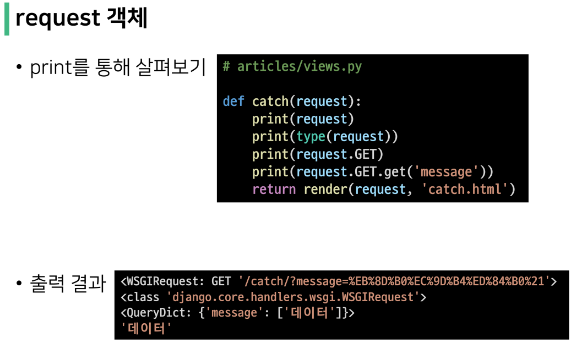

aritcles/views.py

```
def catch(request):
    message = request.GET.get('message')

    context = {
        'message': message,
    }

    return render(request, 'articles/catch.html', context)
```

articles/templates/articles/catch.html
```
{% extends "base.html" %}

{% block content %}
  <h1>Catch</h1>

  <h2>보낸 데이터는 {{ message }}</h2>

  <a href="{% url 'articles:throw' %}">다시 데이터 보내러 가기</a>
{% endblock content %}
```


<b>Request and Response object</b>  

요청과 응답 객체 흐름  

1. 페이지가 요청되면 Django는 요청에 대한 메타데이터를 포함하는 HttpRequest object를 생성  

2. 그리고 해당하는 적절한 view 함수를 로드하고 HttpRequest를 첫 번째 인자로 전달  

3. 마지막으로 view 함수는 HttpResponse object를 반환 

### Django Model(데이터 다루기)

<b>개요</b>

Model의 핵심 개념과 ORM(데이터 베이스를 위한 쉬운 언어)을 통한 데이터베이스 조작 이해  

Django는 웹 애플리케이션의 데이터를 구조화하고 조작하기 위한 추상적이 계층(모델)을 제공  

&nbsp;

### Database

<b>Database</b>

체계화된 데이터의 모임  

검색 및 구조화 같은 작업을 보다 쉽게 하기 위해 조직화된 데이터를 수집하는 저장 시스템  

Database의 가장 기초적인 키워드를 알아보고 자세한 내용은 추후 Database 시간에 다룰 예정  



<b>Database 기본 구조</b>  

1. 스키마(Schema)

2. 테이블(Table)  

&nbsp;

<b>스키마(Schema)</b>  

뼈대(Structure)  

데이터베이스에서 자료의 구조, 표현 방법, 관계 등을 정의한 구조  

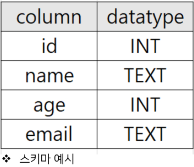

&nbsp;

<b>테이블(Table)</b>  

필드와 레코드를 사용해 조직된 데이터 요소들의 집합  

관계(relation)라고도 부름  

1. 필드(field)
- 속성, 컬럼(Column)

2. 레코드(record)
- 튜플, 행(row)

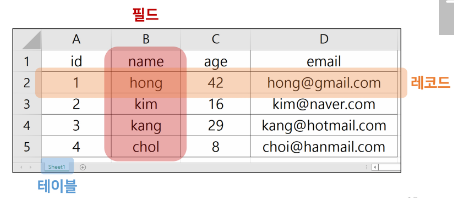

<b>필드(field)</b>  

속성 혹은 column  

각 필드에는 고유한 데이터 형식이 저장됨(INT, TEXT 등...)

&nbsp;

<b>레코드(record)</b>  

튜플 혹은 행(row)  

테이블의 데이터는 레코드에 저장됨  

예를 들어 해당 예시는 4명의 고객정보가 저장되어 있으며, 레코드는 4개가 존재  

&nbsp;

<b>PK (Primary Key)</b>

기본 키

각 레코드의 고유한 값 (식별자로 사용)  

기술적으로 다른 항목과 절대로 중복될 수 없는 단일 값(unique)  

데이터베이스 관리 및 테이블 간 관계 설정 시 주요하게 활용됨


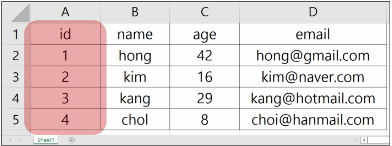


&nbsp;

<b>쿼리(Query)</b>  

데이터를 조회하기 위한 명령어  

조건에 맞는 데이터를 추출하거나 조작하는 명령어(주로 테이블형 자료구조에서)  

Query를 날린다. => 데이터베이스를 조작한다.  


### Model

<b>개요</b>  

 Django는 Model을 통해 데이터에 접근하고 조작  
 
사용하는 데이터들의 필수적인 필드들과 동작들을 포함  

저장된 데이터베이스의 구조 (layout)  

일반적으로 각각의 모델은 하나의 데이터 테이블에 매핑(mapping)  
- 모델 클래스 1개 == 데이터베이스 테이블 1개

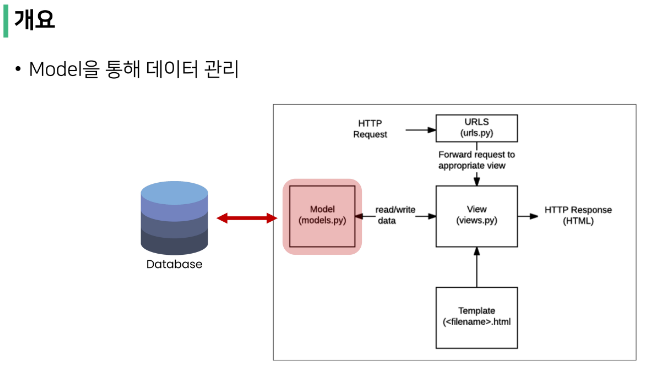

<b>Model 작성하기</b>

model.py 작성
- 모델 클래스를 작성하는 것은 데이터베이스 <b>테이블의 스키마를 정의</b>하는 것  
- 모델 클래스 == 테이블 스키마  

```
# articles/models.py

class Article(models.Model):
    title = models.CharField(max_length=10)
    content = models.TextField()
    # id 컬럼은 테이블 생성 시 Django가 자동으로 생성  

```

<b>Model 이해하기</b>  

각 모델은 django.models.Model 클래스의 서브 클래스  
- 즉 각 모델은 django.db.models의 모듈 Model 클래스를 상속받아 구성됨  
- 클래스 상속 기반 형태의 Django 프레임워크 개발  
    - 프레임워크에서는 잘 만들어진 도구를 가져다가 잘 쓰는 것

&nbsp;

models 모듈을 통해 어떠한 타입의 DB필드(컬럼)을 정의할 것인지 정의  
- Article에는 어떤 데이터 구조가 필요한지 정의  
- 클래스 변수 title과 content는 DB 필드를 나타냄  


<b>Django Model Field</b>  

- Django는 모델 필드를 통해 테이블의 필드(컬럼)에 저장할 데이터 유형 (INT, TEXT 등)을 정의  

- 데이터 유형에 따라 다양한 필드를 제공  
    - ``` DataField(), CharField(), IntegerField() 등```
    - <a href="https://docs.djangoproject.com/en/4.1/ref/models/fields/">https://docs.djangoproject.com/en/4.1/ref/models/fields/</a>

<b>데이터베이스 스키마</b>  

지금까지 작성한 model.py는 데이터베이스 스키마를 정의한 것  
이제 이러한 모델의 변경사항을 실제 데이터베이스에 반영하기 위한 과정이 필요  



### Migrations (번역: 이주, 이동)

<b>개요</b>  

Django가 모델에 생긴 변화(필드 추가, 수정 등)를 실제 DB에 반영하는 방법  

&nbsp;

<b>Migrations 관련 주요 명령어</b>  

1. makemigrations
2. migrate  

&nbsp;

<b>makemigrations</b>  

모델의 변경사항에 대한 새로운 migration을 만들 때 사용  

```python manage.py makemigrations```  

명령어 실행 후 migrations/0001_initial.py가 생성된 것을 확인  

파이썬으로 작성된 설계도  

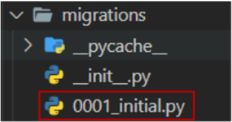

<b>migrate</b>  

makemigrations로 만든 설계도를 실제 데이터베이스에 반영하는 과정(db.sqlite3 파일에 반영)  

결과적으로 모델의 변경사항과 데이터베이스를 동기화  

```$ python manage.py migrate```

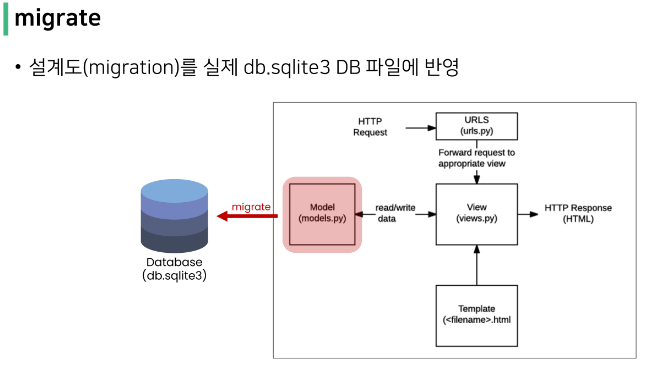

<b>[참고] Migrations 기타 명령어</b>  

1. showmigrations  

```$ python manage.py showmigrations```  

migrations 파일들이 migrate 됐는지 안됐는지 여부를 확인하는 용도  

[X] 표시가 있으면 migrate가 완료되었음을 의미  

2. sqlimigrate  

``` $ python manage.py sqlmigrate articles 0001 ```   

해당 migrations 파일이 SQL문으로 어떻게 해석 될 지 미리 확인할 수 있음  

<b>반드시 기억해야 할 migration 3단계</b>  

1. models.py에서 변경사항이 발생하면  

2. migration 생성  
- makemigrations  

3. DB 반영 (모델과 DB의 동기화)  
- migrate

<b>그런데 설계도는 어떻게, 누가 해석할까</b>  

makemigrations로 인해 만들어진 설계도는 파이썬으로 작성되고 있음  

그런데 SQL만 알아 들을 수 있다는 DB는 어떻게 이 설계도를 이해하고 동기화를 이룰 수 있을까?  

비로 이 과정에서 중간에 번역을 담당하는 것이 <b>ORM</b>


### ORM

<b>개요</b>  

Object-Relational-Mapping  

객체 지향 프로그래밍 언어를 사용하여 호환되지 않는 유형의 시스템 간에 (Django <-> DB)데이터를 변환하는 프로그래밍 기술  

객체 지향 프로그래밍에서 데이터베이스를 연동할 때, 데이터 베이스와 객체 지향 프로그래밍 언어 간의 호환되지 않는 데이터를 변환하는 프로그래밍 기법  

Django는 내장 Django ORM을 사용  

한 마디로 SQL을 사용하지 않고 데이터베이스를 조작할 수 있게 만들어주는 매개체  

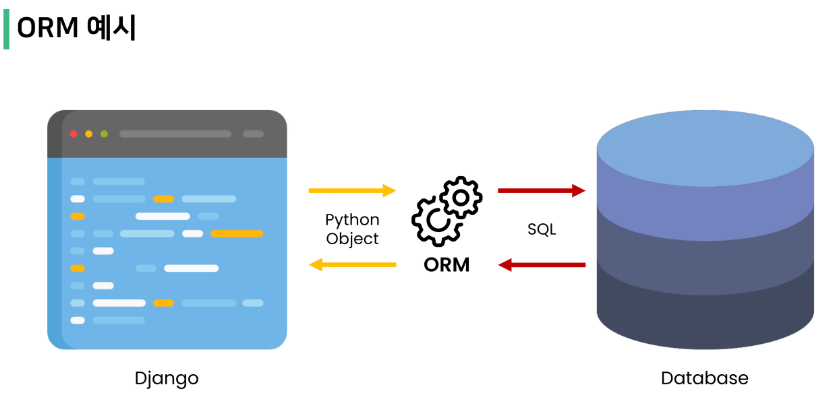

<b>ORM의 장단점</b>  

장점  

- SQL을 잘 알지 못해도 객체 지향 언어로 DB조작이 가능
- 객체 지향적 접근으로 인한 높은 생산성  

단점

- ORM만으로 세밀한 데이터베이스 조작을 구현하기 어려운 경우가 있음  

&nbsp;

<b>ORM을 사용하는 이유</b>  

"생산성"  

현 시대 개발에서 가장 중요한 키워드는 바로 생산성  

우리는 DB를 객체(object)로 조작하기 위해 ORM을 사용할 것  

&nbsp;

<b>Model 정리</b>  

"웹 애플리케이션의 데이터를 구조화하고 조작하기 위한 도구"  


### QuerySet API

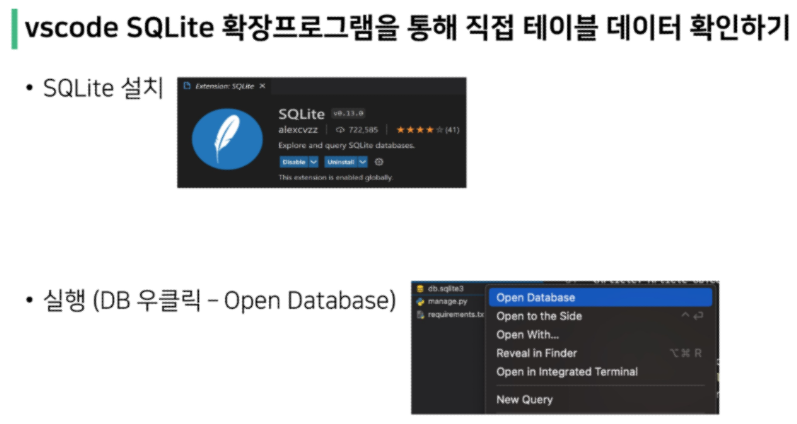

<b>외부 라이브러리 설치 및 설정</b>

```
$ pip install ipython
$ pip install django-extensions
$ pip freeze > requirements.txt
```

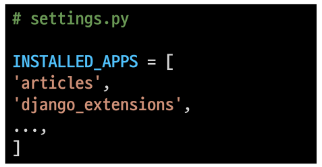

<b>Django shell</b>  

ORM 관련 구문 연습을 위해 파이썬 쉘 환경을 사용  

다만 일반 파이썬 쉘을 통해서 장고 프로그램 환경에 영향을 줄 수 없기 Django환경 안에서 진행할 수 있는 Django shell을 사용  

```
# 기존의 Django shell
$ python manage.py shell

# django-extension이 제공하는 더 강력한 shell_plus로 진행
$ python manage.py shell_plus

# 실행
$ python manage.py shell_plus
```

### QuerySet API

<b>Database API</b>  

Django가 제공하는 ORM을 사용해 데이터베이스를 조작하는 방법  

Model을 정의하면 데이터를 만들고 읽고 수정하고 지울 수 있는 API를 제공  


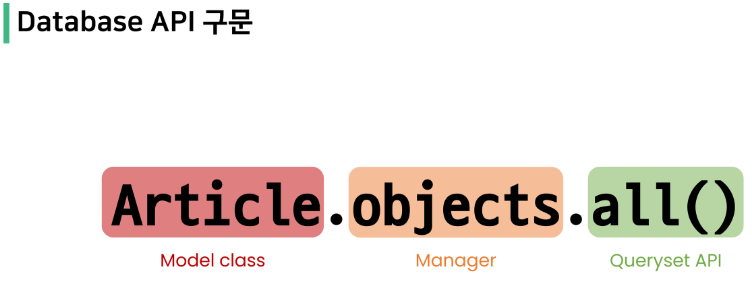

<b>objects manager</b>  

Django 모델이 데이터베이스 쿼리 작업을 가능하게 하는 인터페이스  

Django는 기본적으로 모든 Django 모델 클래스에 대해 objects라는 Manager를 통해 특정 데이터를 조작할 수 있음  

이 Manager를 통해 특정 데이터를 조작할 수 있음  

<i>DB를 Python class로 조작할 수 있도록 여러 메서드를 제공하는 manager</i>  

&nbsp;

<b>Query</b>  

데이터베이스에 특정한 데이터를 보여 달라는 요청  
- "쿼리문을 작성한다."
    - 원하는 데이터를 얻기 위해 데이터베이스에 요청을 보낼 코드를 작성한다.  

이 때, 파이썬으로 작성한 코드가 ORM에 의한 SQL로 변환되어 데이터베이스에 전달되며, 데이터베이스의 응답 데이터를 ORM이 QuerySet이라는 자료 형태로 변환하여 우리에게 전달  

&nbsp;

<b>QuerySet</b>  

데이터베이스에게서 전달 받은 객체 목록(데이터 모음)  
- 순회가 가능한 데이터로써 1개 이상의 데이터를 불러와 사용할 수 있음(반복문을 사용할 수 있음!!)  

Django ORM을 통해 만들어진 자료형이며, 필터를 걸거나 정렬 등을 수행할 수 있음  

object manager를 사용하여 복수의 데이터를 가져오는 queryset method를 사용할 때 반환되는 객체  

단 데이터베이스가 단일한 객체를 반환할 때는 QuerySet이 아닌 모델(Class)의 인스턴스로 반환됨  

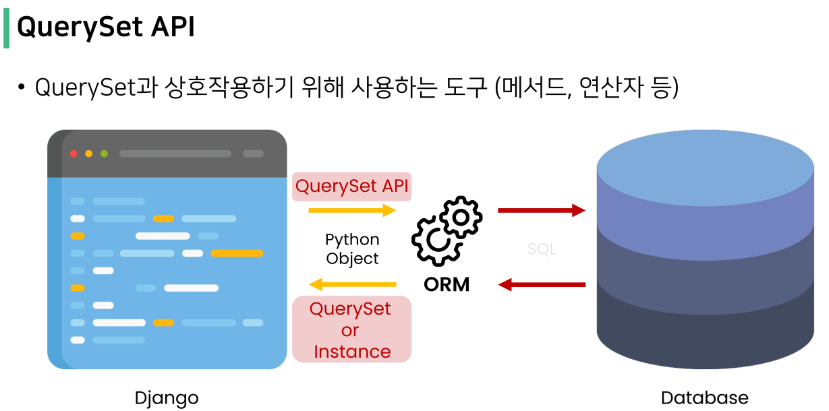

### QuerySet API 익히기

<b>QuerySet API 익히기</b>  

Queryset API를 활용해 데이터를 생성하고, 읽고, 수정하고, 삭제해보기  

&nbsp;

<b>CRUD</b>  

Create/Read/Update/Delete  

대부분의 컴퓨터 소프트웨어가 가지는 기본적인 데이터 처리 기능 4가지를 묶어서 일컫는 말  

### Create

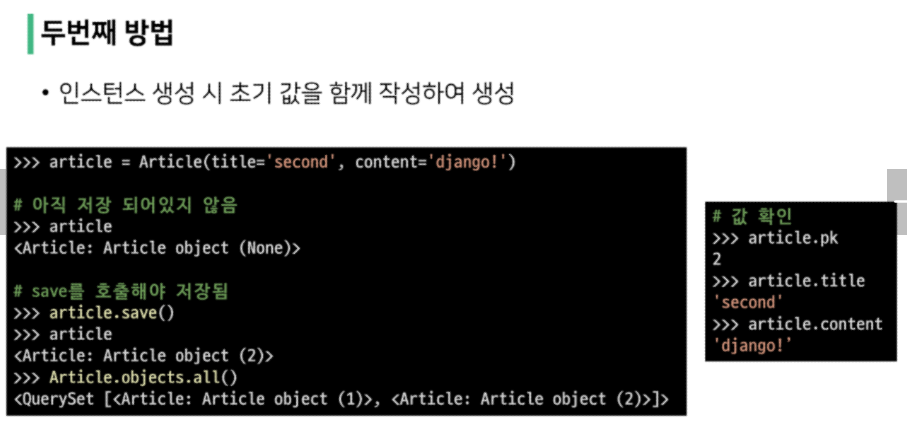

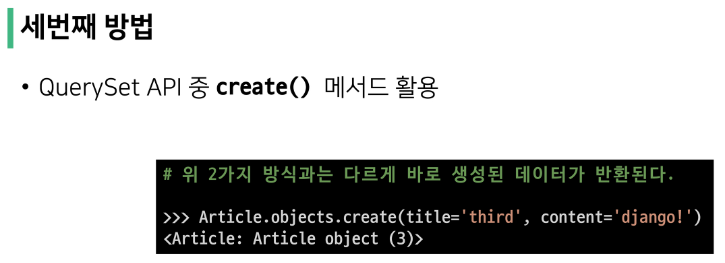

<b>.save()</b>  

"Saving object"  

객체를 데이터베이스에 저장함  

데이터 생성 시 save를 호출하기 전에는 객체의 id값은 None  
- id 값은 Django가 아니라 데이터베이스에서 계산되기 때문

단순히 모델 클래스를 통해 인스턴스르 생성하는 것은 DB에 영향을 미치지 않기 때문에 반드시 save를 호출해야 테이블에 레코드가 생성됨  


### READ

<b>개요</b>  

QuerySet API method를 사용해 데이터를 다양하게 조회하기  

QuerySet API method는 크게 2가지로 분류됨  
1. Method that "return new querysets"  
2. Methods taht "do not return querysets"

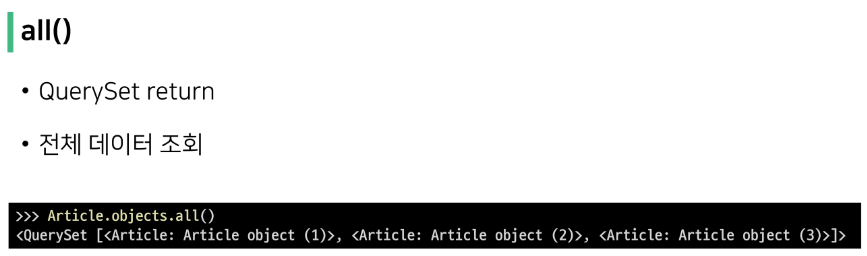

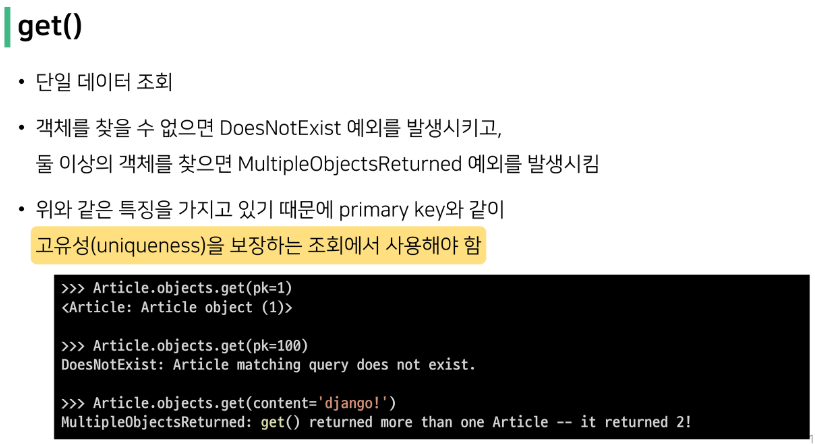

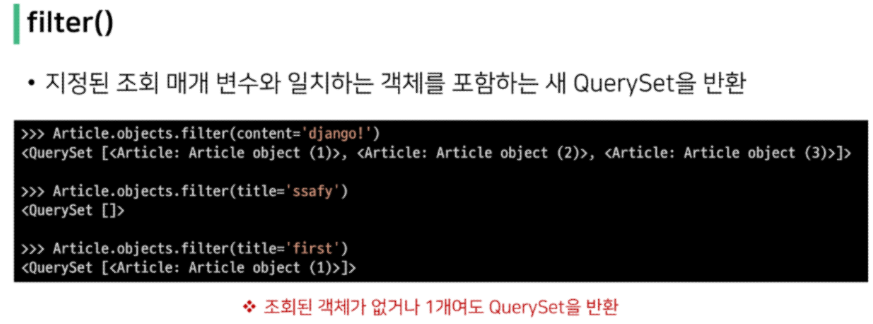

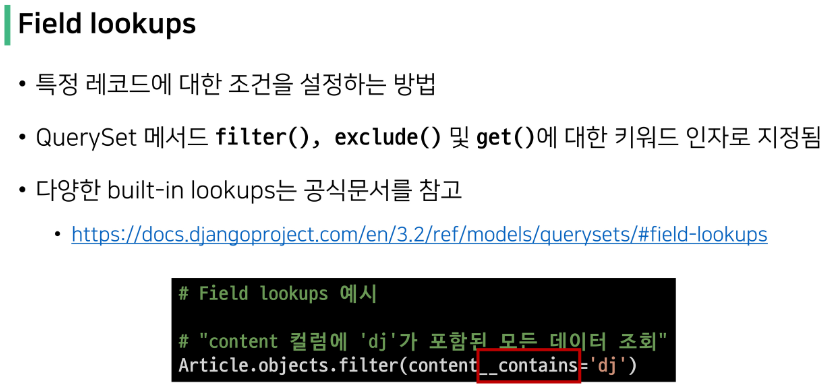

<a href="https://docs.djangoproject.com/en/4.1/ref/models/querysets/">https://docs.djangoproject.com/en/4.1/ref/models/querysets/</a>

### Update

<b>Update 과정</b>  

1. 수정하고자 하는 article 인스턴스 객체를 조회 후 반환 값을 저장  
2. aritcle 인스턴스 객체의 인스턴스 변수 값을 새롱누 값으로 할당  
3. save() 인스턴스 메서드 호출  

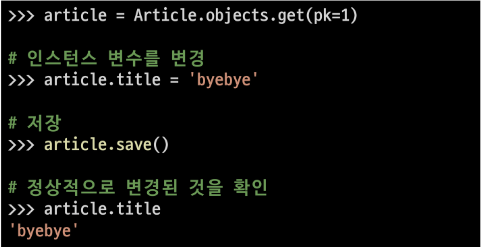

### Delete

<b>Delete 과정</b>  

1. 삭제하고자 하는 article 인스턴스 객체를 조회 후 반환 값을 저장  
2. delete() 인스턴스 메서 호출  

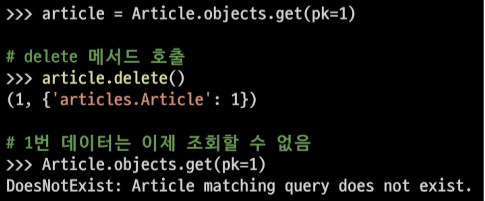